<a href="https://colab.research.google.com/github/kiiriis/CE063_ML/blob/main/Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition

In [1]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

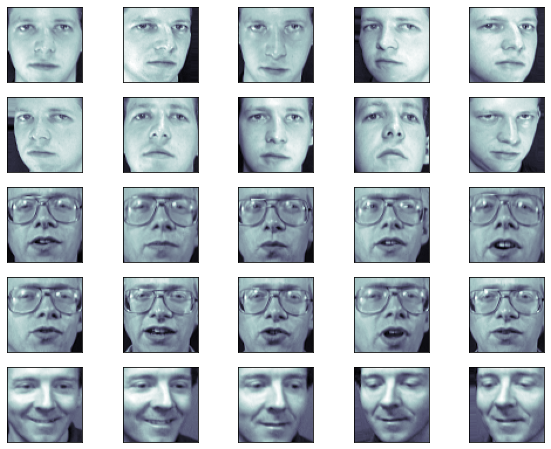

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 8))
# plot several images
for i in range(25):
  ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=63)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


## Without PCA

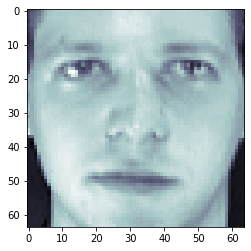

In [4]:
plt.imshow(faces.images[0],
cmap=plt.cm.bone)

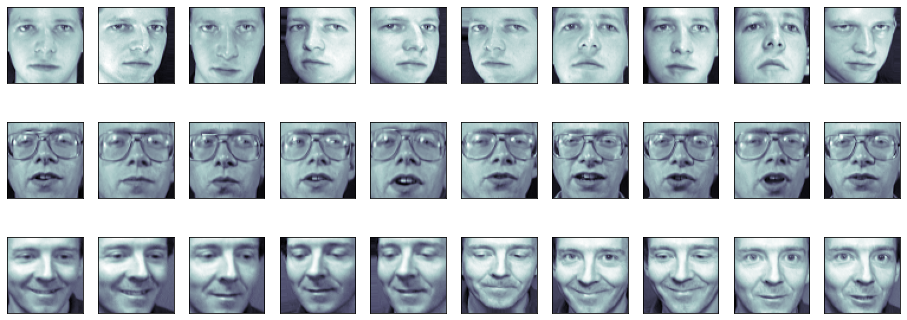

In [5]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i],cmap=plt.cm.bone)

In [6]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred = gnb.predict(X_test)
y_pred

array([ 2, 32, 21,  9,  3, 17,  5, 18, 12,  2, 30,  6, 35, 26, 32, 34, 25,
        9, 25, 35, 24,  9, 27, 28, 12, 12, 10, 20, 36,  5, 11,  6, 23, 32,
       34,  2, 29, 22,  2,  9,  5, 13, 20,  4, 33,  0, 28,  6, 39,  2, 39,
        2,  1, 36, 38,  3, 22, 29, 19,  1, 19,  8, 10, 36, 24, 22,  5, 14,
       16, 29, 28, 13, 16, 32,  8, 18, 28, 38, 37, 22, 26, 20, 19, 25, 14,
        6, 39,  0, 22,  2, 28, 23, 15,  2, 18, 37, 34, 34, 30,  6])

In [8]:
y_test

array([ 4, 32, 21,  9,  3, 17,  5, 18,  8, 13, 30,  6, 35, 26, 32,  4, 25,
        9, 25, 35, 24,  8, 27, 28, 12, 24, 10, 20, 36,  5, 11,  6, 23, 32,
       34,  2, 29, 22,  7,  0,  5, 13, 20,  4, 33,  7, 20,  6, 39,  2, 39,
       16,  1, 36, 38,  3, 22, 29, 19,  1, 19,  8, 10, 36, 24, 22,  5, 14,
       16, 29, 28, 13, 16, 32,  8, 18, 28, 38, 37, 22, 26, 20, 19, 25, 14,
        6, 24,  0, 22, 37, 28, 23,  7,  0, 18, 37, 34, 34, 33,  6])

In [9]:
mean_squared_error(y_test, y_pred)

31.28

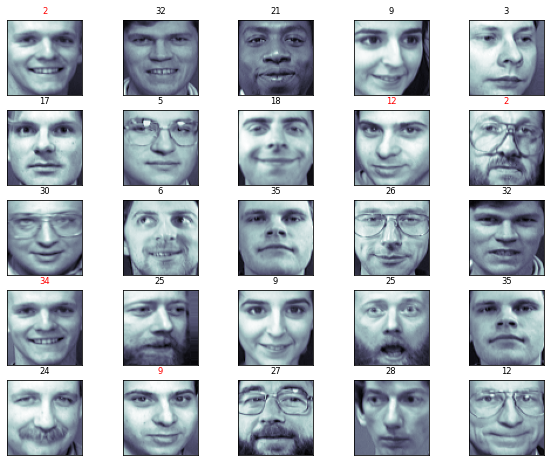

In [11]:
import numpy as np
fig = plt.figure(figsize=(10, 8))
for i in range(25):
  ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

  y_pred = gnb.predict(X_test[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [12]:
from sklearn import metrics
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         2
           2       0.25      1.00      0.40         2
           3       1.00      1.00      1.00         2
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         3
           8       1.00      0.50      0.67         4
           9       0.50      1.00      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       0.33      1.00      0.50         1
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         0
          16       1.00      0.67      0.80         3
          17       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [13]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1 0 1 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 1 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


## Preprocessing : Principal Component Analysis

In [14]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

In [15]:
faces.images[0].shape

(64, 64)

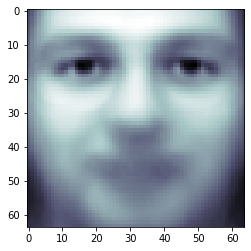

In [16]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
cmap=plt.cm.bone)

In [17]:
print(pca.components_.shape)

(150, 4096)


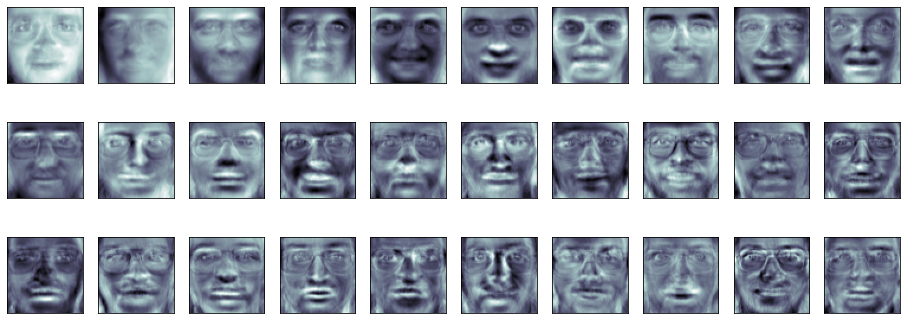

In [18]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [19]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [20]:
print(X_test_pca.shape)

(100, 150)


In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

In [22]:
y_pred = gnb.predict(X_test_pca)
y_pred

array([11, 32, 21,  9,  3, 17,  5, 18, 15, 13, 30,  6, 35, 26, 32,  4, 25,
        9, 25, 35, 12,  9, 27, 28, 12, 12, 10, 20, 36,  5, 11, 15, 23, 32,
       34,  2, 29, 22,  9,  0,  5, 13, 20,  4, 33, 35,  3, 31, 39,  2, 39,
       16,  1, 36, 38,  3, 22, 29, 19,  1, 19,  8, 10, 36, 24, 22,  5, 14,
       16, 29, 28, 15, 16, 32,  8, 18, 28, 38, 37, 11, 26, 30, 15, 11, 14,
        6, 12,  0, 22,  9, 28, 23,  7,  0, 18, 37, 34, 34, 33,  6])

In [23]:
y_test

array([ 4, 32, 21,  9,  3, 17,  5, 18,  8, 13, 30,  6, 35, 26, 32,  4, 25,
        9, 25, 35, 24,  8, 27, 28, 12, 24, 10, 20, 36,  5, 11,  6, 23, 32,
       34,  2, 29, 22,  7,  0,  5, 13, 20,  4, 33,  7, 20,  6, 39,  2, 39,
       16,  1, 36, 38,  3, 22, 29, 19,  1, 19,  8, 10, 36, 24, 22,  5, 14,
       16, 29, 28, 13, 16, 32,  8, 18, 28, 38, 37, 22, 26, 20, 19, 25, 14,
        6, 24,  0, 22, 37, 28, 23,  7,  0, 18, 37, 34, 34, 33,  6])

In [24]:
mean_squared_error(y_test, y_pred)

35.35

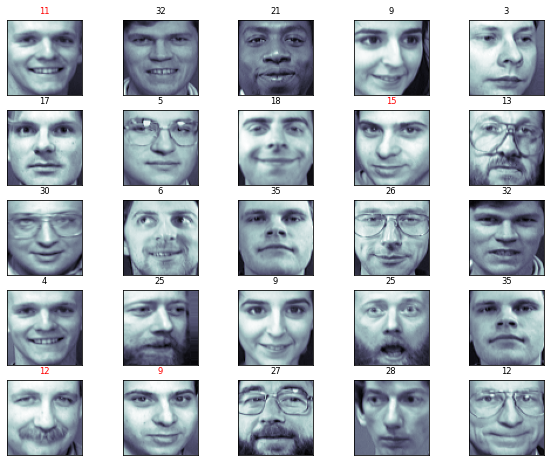

In [25]:
import numpy as np
fig = plt.figure(figsize=(10, 8))
for i in range(25):
  ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [26]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         4
           6       1.00      0.60      0.75         5
           7       1.00      0.33      0.50         3
           8       1.00      0.50      0.67         4
           9       0.40      1.00      0.57         2
          10       1.00      1.00      1.00         2
          11       0.25      1.00      0.40         1
          12       0.25      1.00      0.40         1
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         0
          16       1.00      1.00      1.00         3
          17       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


### Pipelining

In [28]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),

('gnb', GaussianNB())])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


# IRIS Dataset

In [29]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

df = datasets.load_iris()
df.data.shape

(150, 4)

In [30]:
df.target.shape

(150,)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.2, random_state=77)
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


## Without PCA

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 1, 1, 2, 0, 1, 1])

In [34]:
y_test

array([1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 1, 1, 2, 0, 1, 2])

In [35]:
mean_squared_error(y_test, y_pred)

0.13333333333333333

In [36]:
from sklearn import metrics
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.67      1.00      0.80         8
           2       1.00      0.69      0.82        13

    accuracy                           0.87        30
   macro avg       0.89      0.90      0.87        30
weighted avg       0.91      0.87      0.87        30

